PCA (Análise de Componentes Principais)
o	Implemente um algoritmo de PCA a partir do zero. Utilize um conjunto de dados de sua escolha e reduza a dimensionalidade para duas dimensões. Visualize os dados originais e os dados transformados.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [9]:
# 1. Carregar o conjunto de dados Iris
iris = load_iris()
data_iris = iris.data
labels = iris.target
label_names = iris.target_names
display(label_names)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# 2. Normalizar os dados
scaler = StandardScaler()
data_iris_scaled = scaler.fit_transform(data_iris)
display(data_iris_scaled)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
# 3. Calcular a matriz de covariância
cov_matrix_iris = np.cov(data_iris_scaled.T)
display(cov_matrix_iris)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [15]:
# 4. Obter autovalores e autovetores
eigenvalues_iris, eigenvectors_iris = np.linalg.eig(cov_matrix_iris)
display(eigenvalues_iris)

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [16]:
# Ordenar autovalores e autovetores em ordem decrescente
sorted_indices_iris = np.argsort(eigenvalues_iris)[::-1]
eigenvalues_iris = eigenvalues_iris[sorted_indices_iris]
eigenvectors_iris = eigenvectors_iris[:, sorted_indices_iris]

In [17]:
# 5. Reduzir a dimensionalidade para 2D
# Selecionar os dois primeiros autovetores (componentes principais)
principal_components_iris = eigenvectors_iris[:, :2]

In [18]:
# Projetar os dados nos componentes principais
data_iris_pca = data_iris_scaled.dot(principal_components_iris)

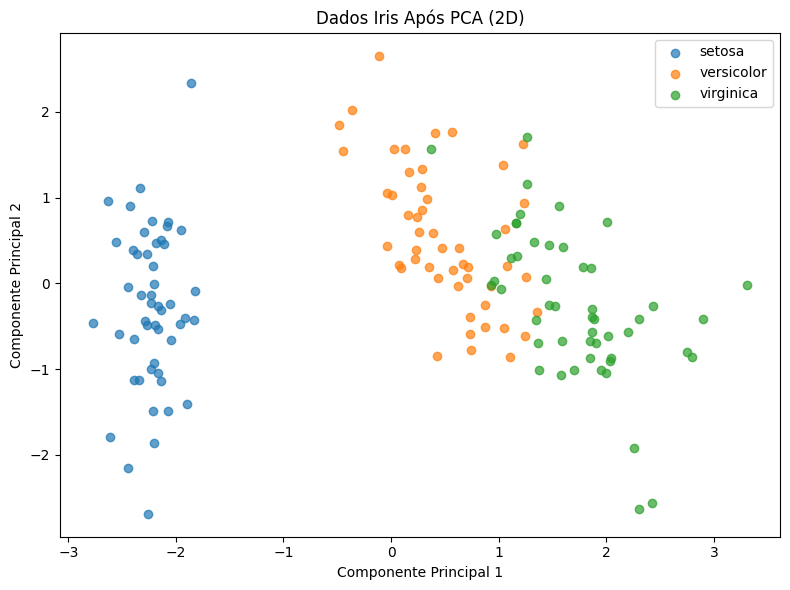

In [26]:
# Plot dos dados transformados em 2D
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(labels)):
    # Definindo rótulos de forma explícita para garantir que cada grupo tenha um rótulo correto
    subset = data_iris_pca[labels == label]
    plt.scatter(subset[:, 0], subset[:, 1], label=label_names[label], alpha=0.7)

plt.title('Dados Iris Após PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.tight_layout()
plt.show()